In [ ]:
"""
   - ------   BINANCE WEBSOCKET ERROR  -------
      -----------  TEST LIVE DATA and DATA BASE --------
              ( - ICI CA MARCHE - )
YT :::
Algovibes
39,3 k abonnés

FIX ERROR BINANCE WEBSOCKET ...

How to get LIVE cryptocurrency data with Python using the 
Binance API / 
ERROR FIXING
https://www.youtube.com/watch?v=OX5eDJDtqhc
https://www.youtube.com/watch?v=OX5eDJDtqhc

YT  :::
INFINITY ALEX  ( - ICI CA MARCHE - )
https://www.youtube.com/watch?v=ml3jGc8RqMk
https://www.youtube.com/watch?v=ml3jGc8RqMk

"""

In [1]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas-ta

  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218925 sha256=7414abe7789cbb6deb9e238c92c6df46776fdbd58cfe04750cc5bfbb9824020f
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\0b\81\f0\cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import sqlalchemy
from binance import Client

In [5]:
import pandas as pd
#import python_ta as ta
import numpy as np

In [6]:
# LE SCREENER  2 ........................................................
api_key ='GwvK4xNzrBr1HpEozMWx2AnWevMRlUZxPgroPvDcy2l4tqdzBH1eBa6PSpriyQTb'
api_secret = 'DGij2y3b9teZHM0vrqafkGzuKbtKCM4wtI3RpA96DqPFNo433HCUJhs4cnSI3MQq'
client = Client(api_key,api_secret)
#client = Client()
client.get_account()  # <<< Pour avoir le solde du compte BINANACE   ...

{'makerCommission': 10,
 'takerCommission': 10,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'updateTime': 1655538880905,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '0.18577195', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'GAS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BCC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '186.03765455', 'locke

In [247]:
symbol ='BTCUSDT'

In [5]:
engine = sqlalchemy.create_engine('sqlite:///'+ symbol + 'stream.db')

<AxesSubplot:>

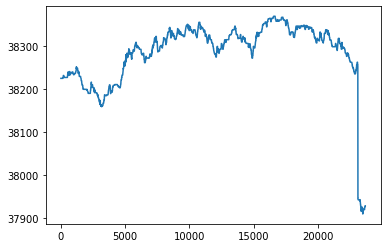

In [6]:
df=pd.read_sql('BTCUSDT', engine)
df.Price.plot()
#Fdf.plot()

In [7]:
def strategy(entry, loockback, qty, open_position=False):
  while True:
    # time.sleep(0.5)
    df=pd.read_sql('BTCUSDT', engine)
    lookbackperiod = df.iloc [-loockback:]
    cumret = (lookbackperiod.Price.pct_change() +1).cumprod() - 1

    df['sma9'] = df['Price'].rolling(9).mean() # <<<--- SMA 9 --------.
    df['sma21'] = df['Price'].rolling(21).mean() # <<<--- SMA 21 --------..
    backrollingN = 10  #  <<<  ---  for SLOPES  ----
    df['slope21'] = df['sma21'].diff(periods=1) # <<<--- SLOPES ------.
    df['slope21'] = df['slope21'].rolling(window=backrollingN).mean()

    
    if not open_position :
      if (cumret [cumret.last_valid_index()] > entry and
          df.Price.iloc[-1] > df.sma21.iloc[-1] and
          df.slope21.iloc[-1] > 0):
          order = client.create_order(symbol='BTCUSDT' ,
                                    side='BUY',
                                    type='MARKET',
                                    quantity=qty)
          print(order)
          print('BUY :::')
          print('BuyPrice : ', df.Price.iloc[-1] )
          open_position = True
          break
  if open_position:
      while True:
        df = pd.read_sql('BTCUSDT', engine)
        sincebuy = df.loc[df.time >
                          pd.to_datetime(order['transactTime'], 
                          unit='ms')]
        if len(sincebuy) > 1:
          sincebuyret = (sincebuy.Price.pct_change() +1).cumprod() - 1
          last_entry = sincebuyret[sincebuyret.last_valid_index()]
          if last_entry > 0.0010 or last_entry < -0.0010:
            order = client.create_order(symbol='BTCUSDT',
                                         side='SELL',
                                         type='MARKET',
                                         quantity=qty)
            print(order)
            print('SELL :::')
            print('SellPrice : ', df.Price.iloc[-1] )

            # Test Price succes et mettre resultat dans summary ...

            open_position = False
            break

In [7]:
# LE SCREENER  2 ........................................................
# Function to get minute by minute...
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback + ' min ago UTC'))  
        
    frame = frame.iloc[:,:6]  # Select First six colonnes .....
    frame.columns =['Time', 'Open', 'High', 'Low', 'Close', 'Volume'] # rename colonnes
    frame = frame.set_index('Time')  # Set time to index  ...
    frame.index = pd.to_datetime(frame.index, unit='ms') # reformat index ...
    frame = frame.astype(float)  # transform string to float
    return frame

In [96]:
def strategyENGULFING(symbol,open_position=False):   # <<<-------  10 JUIN 2022  -------
# def strategyENGULFING(symbol, qty, open_position=False):  
 #     ---------------   DEBUT  10 JUIN 2022   DEBUT  -------------------------
    print('Look  at ::: ', symbol)
       
    invest = 40  #  Dollars ....
    info = client.get_symbol_info(symbol=symbol)
    lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
    prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
    #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
    buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
    buy_qty = round(invest/prize, 3 )    
    #     ---------------   FIN  10 JUIN 2022   FIN  -------------------------
#.def strategyENGULFING(entry, loockback, qty, open_position=False):
  #.while True:
    # time.sleep(0.5)
    # df=pd.read_sql('BTCUSDT', engine)
    df = getminutedata(symbol, '1m', '30') # <<-- 30 dernieres minutes .
    #.df = getminutedata(x['symbol'], '1m', '730') # <<-- 730 minutes pour 12 heures..
    
    #..lookbackperiod = df.iloc [-loockback:]
    #..cumret = (lookbackperiod.Open.pct_change() +1).cumprod() - 1

    #--- CALCULATE  MACD ---
    #https://www.alpharithms.com/calculate-macd-python-272222/
    #https://www.alpharithms.com/calculate-macd-python-272222/
    # Get the 12-day EMA of the closing price--- MACD---
    k = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
    # Get the 26-day EMA of the closing price
    d = df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()    
    # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
    macd = k - d
    # Get the 9-Day EMA of the MACD for the Trigger line
    macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
    # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
    macd_h = macd - macd_s
    # Add all of our new values for the MACD to the dataframe
    df['macd'] = df.index.map(macd)
    df['macd_s'] = df.index.map(macd_s)
    df['macd_h'] = df.index.map(macd_h)   # <<<--- MACD Histogramme ...
    #--- FIN  CALCULATE  MACD FIN ---   
    #--- CALCULATE  RSI-STOCHASTIC  --- 
    # https://www.alpharithms.com/stochastic-oscillator-in-python-483214/
    # https://www.alpharithms.com/stochastic-oscillator-in-python-483214/
#...    import pandas_ta as ta
    # Add some indicators
#...    df.ta.stoch(high='high', low='low', k=14, d=3, append=True)    
    #--- FIN  CALCULATE  RSI-STOCHASTIC FIN ---   
     
    #--- CALCULATE  EMA 50 ---
    df['sma50'] = df['Close'].rolling(50).mean() # <<<--- SMA 50 --------..    
    #--- FIN CALCULATE  EMA 50 FIN ---


    df['sma9'] = df['Close'].rolling(9).mean() # <<<--- SMA 9 --------.
    df['sma21'] = df['Close'].rolling(21).mean() # <<<--- SMA 21 --------..
    df['sma100'] = df['Close'].rolling(100).mean() # <<<--- SMA 100 --------..

    backrollingN = 10  #  <<<  ---  for SLOPES  ----
    df['slope21'] = df['sma21'].diff(periods=1) # <<<--- SLOPES ------.
    df['slope21'] = df['slope21'].rolling(window=backrollingN).mean()

    #bodydiff[row] = abs(df.Open.iloc[-1]-df.Close.iloc[-1])
    bodydiff = abs(df.Open.iloc[-1]-df.Close.iloc[-1])
    bodydiffprec = abs(df.Open.iloc[-2]-df.Close.iloc[-2])
    bodydiffmin = 0.003
    #if (not open_position and df.Close.iloc[-1] < 100):  # <<-- in_position ...
    if not open_position :  # <<-- in_position ...  
      #if (cumret [cumret.last_valid_index()] > entry and
      #    df.Price.iloc[-1] > df.sma21.iloc[-1] and
      #    df.slope21.iloc[-1] > 0):
#.    if (bodydiff > bodydiffmin and bodydiffprec > bodydiffmin and
      if (bodydiff > bodydiffmin and       
          df.Open.iloc[-2] > df.Close.iloc[-2] and
          df.Open.iloc[-1] < df.Close.iloc[-1] and

          df.Close.iloc[-1] > df.sma21.iloc[-1] and # <<< ---- check SMA 21 ...
          df.Close.iloc[-1] > df.sma9.iloc[-1] and # <<< ---- check SMA 9 ...
          df.Close.iloc[-1] > df.sma50.iloc[-1] and # <<< ---- check SMA 50 ou 100 ...          

          #df.sma9.iloc[-1] >= df.sma21.iloc[-1] and # <<< ---- check SMA 9 Crossed SMA21 ... 
          #((df.sma9.iloc[-2] < df.sma21.iloc[-2]) or (df.sma9.iloc[-3] < df.sma21.iloc[-3]) ) and
          
           #open[row]<=close[row-1] and close[row]>open[row-1]):
          (df.Open.iloc[-1]-df.Close.iloc[-2])<=-0e-5 and df.Close.iloc[-1]>df.Open.iloc[-2] 
          ):          
          # order = client.create_order(symbol='BTCUSDT' ,
          
          order = client.create_order(symbol=symbol ,
                                    side='BUY',
                                    type='MARKET',
                                    quantity=buy_qty)
          print(order)
       
               # index3 +=1  #  <<< ----   INDEX 3  ......
          print('BUY :::')
          BuyPrice = df.Close.iloc[-1]
          print('BuyPrice : ', df.Close.iloc[-1] )

          # -----------  BUY TIME  ----------------------
          # https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
          # https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
          # importing datetime module for now() 
          import datetime     
          # using now() to get current time 
          Buytime = datetime.datetime.now()   
          YearB = Buytime.year
          MonthB = Buytime.month 
          DayB = Buytime.day
          HourB = Buytime.hour
          MinuteB = Buytime.minute 
          SecondB = Buytime.second 
          # ----------END - BUY TIME -END---------------

          #return symbol, index3, buy_qty, BuyPrice, 0, 0
          
          open_position = True
          # open_position = False
          #return symbol, 0, buy_qty, BuyPrice, 0, 0

      elif (df.Close.iloc[-1] > df.sma50.iloc[-1]  and  # --- MACD STRATEGY MACD ---
            df.macd.iloc[-1] >= df.macd_s.iloc[-1] and # <<< ---- check cross MACD ... 
            df.macd.iloc[-2] < df.macd_s.iloc[-2]      
             ): 
          pass      
                   
      else:
          print('No ', symbol ,' ENGULFING Trade has been found executed')
          BuyPrice = df.Close.iloc[-1]

          #return symbol, BuyPrice,0, 0, 0, 0
          #return symbol, index3, buy_qty, BuyPrice, 0, 0
          #return symbol, 0, 0, BuyPrice, 0, 
          return symbol, 0, 0, BuyPrice, 0, 0,0,0,0,0,0,0,0,0,0,0
       

          #.break
    if open_position:     # <<-- in_position ...
        while True:
          #.df = pd.read_sql('BTCUSDT', engine)
          df = getminutedata(symbol, '1m', '30') # <<-- 30 dernieres minutes ...
          sincebuy = df.loc[df.index >
                            pd.to_datetime(order['transactTime'], 
                            unit='ms')]
          if len(sincebuy) > 0:
            sincebuyret = (sincebuy.Open.pct_change() +1).cumprod() - 1
            #. last_entry = sincebuyret[sincebuyret.last_valid_index()]
            #. if last_entry > 0.0010 or last_entry < -0.0010:
            #.if sincebuyret[-1] > 0.0017 or sincebuyret[-1] < -0.0007:
            if sincebuyret[-1] > 0.0014 or sincebuyret[-1] < -0.0007:    
              # order = client.create_order(symbol='BTCUSDT',
              order = client.create_order(symbol=symbol,
                                           side='SELL',
                                           type='MARKET',
                                           quantity=buy_qty)
              print(order)
              print('SELL :::')
              SellPrice = df.Close.iloc[-1]
              print('SellPrice : ', df.Close.iloc[-1] )

              # Test Price succes et mettre resultat dans summary ...
              #new_row = {'Symbol': symbol,
              #              'index3': index3,
              #                'Qty': buy_qty,
              #          'BuyPrice': BuyPrice,
              #          'Diff9-21': (SellPrice-BuyPrice),
              #          'SellPrice': SellPrice
              #          }
              #summary_2 = summary_2.append(new_row, ignore_index = True)
              # -----------  SELL TIME  ----------------------
              # https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
              # https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
              # importing datetime module for now() 
              #import datetime     
              # using now() to get current time 
              Selltime = datetime.datetime.now()   
              YearS = Selltime.year
              MonthS = Selltime.month 
              DayS = Selltime.day
              HourS = Selltime.hour
              MinuteS = Selltime.minute 
              SecondS = Selltime.second 
              # ----------END - SELL TIME -END---------------


              open_position = False
              # return symbol, 0, buy_qty, BuyPrice, 0, SellPrice
              return symbol, 0, buy_qty, BuyPrice, 0, SellPrice, YearB, MonthB, DayB, HourB, MinuteB, SecondB, DayS, HourS, MinuteS, SecondS
              break

            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN
    #. return symbol, BuyPrice
    #return symbol, 0, 0, 0, 0, 0 

In [62]:
def strategyENGULFING___BACKUP(symbol, index, open_position=False):   # <<<-------  10 JUIN 2022  -------
# def strategyENGULFING(symbol, qty, open_position=False):  
 #     ---------------   DEBUT  10 JUIN 2022   DEBUT  -------------------------
    print('Look  at ::: ', symbol)
    print('index_3 at ::: ', index)

    invest = 40  #  Dollars ....
    info = client.get_symbol_info(symbol=symbol)
    lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
    prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
    #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
    buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
    buy_qty = round(invest/prize, 3 )    
    #     ---------------   FIN  10 JUIN 2022   FIN  -------------------------
#.def strategyENGULFING(entry, loockback, qty, open_position=False):
  #.while True:
    # time.sleep(0.5)
    # df=pd.read_sql('BTCUSDT', engine)
    df = getminutedata(symbol, '1m', '30') # <<-- 30 dernieres minutes .
    #.df = getminutedata(x['symbol'], '1m', '730') # <<-- 730 minutes pour 12 heures..
    
    #..lookbackperiod = df.iloc [-loockback:]
    #..cumret = (lookbackperiod.Open.pct_change() +1).cumprod() - 1

    df['sma9'] = df['Close'].rolling(9).mean() # <<<--- SMA 9 --------.
    df['sma21'] = df['Close'].rolling(21).mean() # <<<--- SMA 21 --------..
    backrollingN = 10  #  <<<  ---  for SLOPES  ----
    df['slope21'] = df['sma21'].diff(periods=1) # <<<--- SLOPES ------.
    df['slope21'] = df['slope21'].rolling(window=backrollingN).mean()

    #bodydiff[row] = abs(df.Open.iloc[-1]-df.Close.iloc[-1])
    bodydiff = abs(df.Open.iloc[-1]-df.Close.iloc[-1])
    bodydiffprec = abs(df.Open.iloc[-2]-df.Close.iloc[-2])
    bodydiffmin = 0.003
    if not open_position :  # <<-- in_position ...
      #if (cumret [cumret.last_valid_index()] > entry and
      #    df.Price.iloc[-1] > df.sma21.iloc[-1] and
      #    df.slope21.iloc[-1] > 0):
      if (bodydiff > bodydiffmin and bodydiffprec > bodydiffmin and
          df.Open.iloc[-2] > df.Close.iloc[-2] and
          df.Open.iloc[-1] < df.Close.iloc[-1] and

          df.Close.iloc[-1] > df.sma21.iloc[-1] and # <<< ---- check SMA 21 ...
          df.Close.iloc[-1] > df.sma9.iloc[-1] and # <<< ---- check SMA 9 ...  
          df.sma9.iloc[-1] >= df.sma21.iloc[-1] and # <<< ---- check SMA 9 > SMA21 ... 

          # df.sma9.iloc[-2] < df.sma21.iloc[-2] and
           #open[row]<=close[row-1] and close[row]>open[row-1]):
          (df.Open.iloc[-1]-df.Close.iloc[-2])<=-0e-5 and df.Close.iloc[-1]>df.Open.iloc[-2] 
          ):          
          # order = client.create_order(symbol='BTCUSDT' ,
          order = client.create_order(symbol=symbol ,
                                    side='BUY',
                                    type='MARKET',
                                    quantity=buy_qty)
          print(order)
          index3 +=1  #  <<< ----   INDEX 3  ......
          print('BUY :::')
          BuyPrice = df.Close.iloc[-1]
          print('BuyPrice : ', df.Close.iloc[-1] )
          open_position = True
      else:
          print('No ', symbol ,' ENGULFING Trade has been found executed')    
          #.break
    if open_position:     # <<-- in_position ...
        while True:
          #.df = pd.read_sql('BTCUSDT', engine)
          df = getminutedata(symbol, '1m', '30') # <<-- 30 dernieres minutes ...
          sincebuy = df.loc[df.index >
                            pd.to_datetime(order['transactTime'], 
                            unit='ms')]
          if len(sincebuy) > 0:
            sincebuyret = (sincebuy.Open.pct_change() +1).cumprod() - 1
            #. last_entry = sincebuyret[sincebuyret.last_valid_index()]
            #. if last_entry > 0.0010 or last_entry < -0.0010:
            #.if sincebuyret[-1] > 0.0017 or sincebuyret[-1] < -0.0007:
            if sincebuyret[-1] > 0.0011 or sincebuyret[-1] < -0.0007:    
              # order = client.create_order(symbol='BTCUSDT',
              order = client.create_order(symbol=symbol,
                                           side='SELL',
                                           type='MARKET',
                                           quantity=buy_qty)
              print(order)
              print('SELL :::')
              SellPrice = df.Close.iloc[-1]
              print('SellPrice : ', df.Close.iloc[-1] )

              # Test Price succes et mettre resultat dans summary ...
              new_row = {'Symbol': symbol,
                            'index3': index3,
                              'Qty': buy_qty,
                        'BuyPrice': BuyPrice,
                        'Diff9-21': (SellPrice-BuyPrice),
                        'SellPrice': SellPrice
                        }

              #new_row = {'Symbol': symbol,
              #              'index3': index3,
              #                'Qty': buy_qty,
              #          'BuyPrice': BuyPrice,
              #          'Buytime': Buytime,
              #          'Diff9-21': diff9_21,
              #          'SellPrice': SellPrice,
              #          'Selltime': Selltime
              #          }
              summary_2 = summary_2.append(new_row, ignore_index = True)

              open_position = False
              break

            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 

In [ ]:
strategy(0.001, 300, 0.001)

In [ ]:
import time
open_position = False
while True:
    # time.sleep(60) # <<< --- 60 pour 1 minute ...
    if not open_position:
        strategy(0.001, 300, 0.001)

In [10]:
import time
open_position = False
while True:
    time.sleep(10) # <<< --- 60 pour 1 minute ...
    print('Test   Temp dattente  xx .......')
    # if not open_position:
    #     strategy(0.001, 300, 0.001)
    #     strategyENGULF(0.001, 300, 0.001)

Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......


KeyboardInterrupt: 

In [23]:
symbol ='BTCUSDT'
open_position = False
strategyENGULFING(symbol, 0.001)

No ENGULFING Trade has been found executed


In [220]:
# Buy quantity ....
symbol ='ENSUSDT'
invest = 40  #  Dollars ....
def buy_quantity(symbol, invest):

    info = client.get_symbol_info(symbol=symbol)
    lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
    print(lotsize)
    #test = str(lotsize).split('.')[1]
    #print(test)
    prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
    long = len(str(lotsize).split('.')[0] )
    buy_qty = round(invest/prize, long )
    
    return buy_qty

In [221]:
buy_qty = buy_quantity(symbol, invest)
buy_qty

0.01


1.9

In [109]:

#buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
buy_qty = round(invest/prize, 3 )

In [111]:
buy_qty

0.194

In [222]:
import time

symbol ='BTCUSDT'
open_position = False
print('Test   Temps dattente  xx .......')
while True:
    # time.sleep(60) # <<< --- 60 pour 1 minute ...
    if not open_position:
        # Buy quantity ....
        symbol ='BTCUSDT'
        invest = 40  #  Dollars ....
        #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
        #buy_qty = round(invest/prize, 3 )
        buy_qty = buy_quantity(symbol, invest)
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)    
   

    print('Test   Temps dattente  xx .......')
    time.sleep(60) # <<< --- 60 pour 1 minute ...
    
                                              

Test   Temps dattente  xx .......
1e-05
No  BTCUSDT  ENGULFING Trade has been found executed
Test   Temps dattente  xx .......


KeyboardInterrupt: 

In [79]:
"""
---------------------------  NEW SCREENER  ---------------------
---------------  ENGULFING     ENGULFING     ENGULFING     ENGULFING  ------------
--------------------    BINANCE 1 MINUTE  ---------------
JEUDI 07 AVRIL 2022
"""
# !pip install python-binance
from binance import Client
import pandas as pd
#import python_ta as ta
import numpy as np

client=Client()
tickersBinance = client.get_all_tickers() # << Get ALL TICKERS ....

# LE SCREENER  2 ........................................................
# Function to get minute by minute...
#def getminutedata(symbol, interval, lookback):
#    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback + ' min ago UTC'))  
#        
#    frame = frame.iloc[:,:6]  # Select First six colonnes .....
#    frame.columns =['Time', 'Open', 'High', 'Low', 'Close', 'Volume'] # rename colonnes
#    frame = frame.set_index('Time')  # Set time to index  ...
#    frame.index = pd.to_datetime(frame.index, unit='ms') # reformat index ...
#    frame = frame.astype(float)  # transform string to float
#    return frame
#  ENGULFING  signals
import random
def Revsignal1(df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    sma21 = list(df1['21-day']) # <<< ---- check SMA 21 ... 
    sma9 = list(df1['9-day']) # <<< ---- check SMA 9 ...  
    sma100 = list(df1['100-day']) # <<< ---- check SMA 100 ...  
               
    signal = [0] * length
    bodydiff = [0] * length

    for row in range(1, length):
        bodydiff[row] = abs(open[row]-close[row])
        bodydiffmin = 0.003
        if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            open[row-1]<close[row-1] and
            open[row]>close[row] and 

            #open[row]>=close[row-1] and close[row]<open[row-1]):
            (open[row]-close[row-1])>=+0e-5 and close[row]<open[row-1]):
            signal[row] = 1
        elif (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            open[row-1]>close[row-1] and
            open[row]<close[row] and

            close[row]>sma21[row] and # <<< ---- check SMA 21 ...
            close[row]>sma9[row] and # <<< ---- check SMA 9 ...  
            close[row]>sma100[row] and # <<< ---- check SMA 100 ...

            #sma9[row] > sma21[row] and # <<< ---- check SMA 9 Crossed SMA21 ...
            #sma9[row-1] < sma21[row-1] and                        

            #open[row]<=close[row-1] and close[row]>open[row-1]):
            (open[row]-close[row-1])<=-0e-5 and close[row]>open[row-1]):
            signal[row] = 2
        else:
            signal[row] = 0
        #signal[row]=random.choice([0, 1, 2])
        #signal[row]=1
    return signal
#  ENGULFING  Target
def mytarget(df1, barsfront):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    trendcat = [None] * length

    piplim = 700e-5
  #  piplim = 500e-5      
  #  piplim = 300e-5
  # piplim = 100e-5    
    for line in range (0, length-1-barsfront):
        for i in range(1,barsfront+1):
            if ((high[line+i]-max(close[line],open[line]))>piplim) and ((min(close[line],open[line])-low[line+i])>piplim):
                trendcat[line] = 3 # no trend
            elif (min(close[line],open[line])-low[line+i])>piplim:
                trendcat[line] = 1 #-1 downtrend
                break
            elif (high[line+i]-max(close[line],open[line]))>piplim:
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend  
    return trendcat

#df['Trend'] = mytarget(df,3)
#df.head(30)

def TOP_ENGULFING(): # <<-- For New TOP Engulfing LIST..
    # LE SCREENER  2 .(SUITE) ................................................
    """
    CODE from  :  SP500_SCREENER_POLISH.ipynb  ( - POLISH - )
    05 Mars 2022
    YT ::: 
    Python enthusiast       <<<< ---  ---      ( - POLISH -)
    3,05 k abonnés
    https://www.youtube.com/watch?v=sXqvhmqzXqc
    GitHub CODE: 
    https://github.com/kosta93/Fundamenta...
    """

    # balance_sheet = []
    # income_statement = []
    # cfs = []
    # years = []
    # profitability_score = 0
    # leverage_score = 0
    # operating_efficiency_score = 0
    # pe_ratio = 0
    """
    summary = pd.DataFrame(columns = ['Ticker', 'PE ratio',
                                  'Profitability', 'Leverage',
                                  'Operating eficiency'])
    """
    summary = pd.DataFrame(columns = ['Symbol', 'index',
                                  'Qty', 'Rendement'])

    index =0
    # for ticker in tickers[5000:6010]:
    #for ticker in tickers[349:350]:
    #for ticker in tickers[99:100]:  
    #for ticker in tickers: 
    #for x in tickersBinance[0:500]:
    #for x in tickersBinance:
    #.for x in tickersBinance[416:418]:  # BTC/USDC  et BNB/USDC
    for x in tickersBinance:      
        try:
            # get_data(ticker)
            #..username = input("Enter username:")
            #..print("Username is: " + username)
            #get_data_2(ticker)
            #get_data_2_NEW(ticker)

            #...................LE SCREENER  2 .............................
            #..............................................................
            #df = getminutedata(x['symbol'], '1m', '15')
            #df = getminutedata(x['symbol'], '1m', '30') 
            #df = gethourdata(x['symbol'], '1h', '30') 
    #.  df = getdaydata(x['symbol'], '1d', '365')
    #.  df = gethourdata(x['symbol'], '1h', '730')  
            df = getminutedata(x['symbol'], '1m', '730') # <<-- 730 pour 12 heures..
        #   df = getminutedata(x['symbol'], '1m', '1460') # <<-- 1460 pour 24 heures..        
    #      df = getminutedata(x['symbol'], '1m', '43200') # <<-- 43200 pour 1 moi..                                     
            symbol = x['symbol']
            #.applytechnicals(df)

            #Check if NA values are in data from ENGULFING ...
            df.isna().sum()    

            df['9-day'] = df['Close'].rolling(9).mean() # <<<--- SMA 9 --------.
            df['21-day'] = df['Close'].rolling(18).mean() # <<<--- SMA 21 --------..
            #df['100-day'] = df['Close'].rolling(100).mean() # <<<--- SMA 100 --------..
            df['100-day'] = df['Close'].rolling(50).mean() # <<<--- SMA 100 --------..

            backrollingN = 10  #  <<<  ---  for SLOPES  ----
            df['slope21-day'] = df['21-day'].diff(periods=1) # <<<--- SLOPES ------.
            df['slope21-day'] = df['slope21-day'].rolling(window=backrollingN).mean()

            df['signal1'] = Revsignal1(df)   # <<<--- ENGULFING  signals
            df['Trend'] = mytarget(df,5)    #  <<<--- ENGULFING  Target
            # Detect FALSE Positives for ENGULFING...
            # Detect FALSE Positives for ENGULFING...
            # Detect FALSE Positives for ENGULFING...
            conditions = [(df['Trend'] == 1) & (df['signal1'] == 1),(df['Trend'] == 2) & (df['signal1'] == 2)]
            values = [1, 2]
            df['result'] = np.select(conditions, values)

            trendId=2
            rendement = df[df['result']==trendId].result.count()/df[df['signal1']==trendId].signal1.count()
            print(f'Check {index} for {symbol}:::',df[df['result']==trendId].result.count()/df[df['signal1']==trendId].signal1.count())
            df[ (df['Trend']!=trendId) & (df['signal1']==trendId) ] # << False Positives ...
            # FIN  Detect FALSE Positives for ENGULFING... FIN 
            # FIN  Detect FALSE Positives for ENGULFING... FIN 
        

            df[df['signal1']==2].count()       #<< COMPTER for and from ENGULFING
            qty = df[df['signal1']==trendId].signal1.count()       #<< COMPTER for and from ENGULFING

            print(f'Check {index} for {symbol} ...')
            # df.Open.plot(figsize=(30,5))  # <<< --- VIZ   ???
            # cumret = (df.Open.pct_change() + 0 ) 
            # cumret.plot(figsize=(30,5))   # <<< --- VIZ   ???  
            #.check(df) # <<< --- Check STRATEGY MACD CROSSED ....
            print(df[df['signal1']==2].count()) #<< COMPTER for and from ENGULFING
        
        # print(df)
            #...............................................................
            #................ FIN LE SCREENER  2 FIN .......................

            #..mean_reverse(ticker)        
            # pe(ticker)
            # profitability()
            # leverage()
            # operating_efficiency()
            # new_row = {'Ticker': ticker,
            #           'PE ratio': pe_ratio,
            #           'Profitability': profitability_score,
            #           'Leverage': leverage_score,
            #           'Operating eficiency': operating_efficiency_score}
            if qty >=1:
                new_row = {'Symbol': symbol,
                            'index': index,
                              'Qty': qty,
                        'Rendement': rendement}
                summary = summary.append(new_row, ignore_index = True)

            print(symbol + ' << is added.')
            print()
       #  time.sleep(1)  # << TIME  !!!
        except:
            print(symbol + ': SOMETHING WENT WRONG  !!!.')
        index +=1    
    # summary['Total score'] = summary['Profitability'] + summary['Leverage'] + summary['Operating eficiency']
    # summary.to_csv('Summary.csv')
    return summary
    

In [80]:
df2 = TOP_ENGULFING()

c:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py:182: RuntimeWarning: invalid value encountered in longlong_scalars


Check 0 for ETHBTC::: nan
Check 0 for ETHBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
100-day        0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
ETHBTC << is added.

Check 1 for LTCBTC::: nan
Check 1 for LTCBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
100-day        0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
LTCBTC << is added.

Check 2 for BNBBTC::: nan
Check 2 for BNBBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
100-day        0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
BNBBTC << is added.

Check 3 for NEOBTC::: nan
Check 3 for NEOBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day

In [81]:
df2 = df2.sort_values(by='Rendement', ascending=False) # << Tirer Rendement ...

In [83]:
df2 = df2.loc[df2['Qty'] > 5] # << Filter Qty > 6  ...

In [85]:
df2 = df2[df2['Symbol'].str.contains('USDT|BUSD|USDC|TRY')] # << Filter Only USDT or BUSD or ...
df2 = df2[df2['Symbol'].str.contains('USDT|BUSD|USDC')] # << Filter Only USDT or BUSD or ...
# df2 = df2[df2['Symbol'].str.contains('USDT')] # << Filter Only USDT or BUSD or ...

In [97]:
df2

Symbol index Qty  Rendement
135      FXSBUSD  1279   6   1.000000
38       USDTRUB   688   6   1.000000
120     UNFIBUSD  1163   8   1.000000
100     AVAXBUSD  1051  12   1.000000
80       DOTUSDT   954   7   1.000000
74       YFIUSDT   912   6   1.000000
13       XMRUSDT   475   6   1.000000
155      LPTUSDT  1448   6   1.000000
20       BNBBUSD   613  15   1.000000
2        BNBUSDT    98  16   0.937500
102      HNTUSDT  1054  10   0.900000
91   DOTDOWNUSDT  1018   9   0.888889
0        BTCUSDT    11  24   0.875000
45       SOLUSDT   779  16   0.875000
46       SOLBUSD   780  16   0.875000
101     AVAXUSDT  1052  14   0.857143
201      APEUSDT  1969  14   0.857143
151      ICPUSDT  1424   7   0.857143
9        ETHUSDC   418  19   0.842105
44       XMRBUSD   756   6   0.833333
117      AXSUSDT  1139   6   0.833333
153       ARUSDT  1433  12   0.833333
108     AAVEBUSD  1091  11   0.818182
21       BTCBUSD   614  22   0.818182
143     BIFIBUSD  1339  10   0.800000
182      ENSUSDT  1742  10   0.800000
64   ETHDOWNUSDT   851  10   0.800000
28       BCHUSDT   661  14   0.785714
190      FXSUSDT  1813   9   0.777778
202      APEBUSD  1970  13   0.769231
1        ETHUSDT    12  30   0.766667
208     BIFIUSDT  1989  12   0.750000
8        BTCUSDC   417  19   0.736842
86      EGLDBUSD  1001  11   0.727273
10      LINKUSDT   431  11   0.727273
4        LTCUSDT   190  22   0.727273
62       SNXUSDT   849  17   0.705882
5        ETCUSDT   351  17   0.705882
23       ETHBUSD   632  27   0.666667
47     BTCUPUSDT   795   9   0.666667
174      SOLUSDC  1648   9   0.666667
109     AAVEUSDT  1092  11   0.636364
121     UNFIUSDT  1164  11   0.636364
31       FTTUSDT   681  19   0.631579
3        NEOUSDT   141   8   0.625000
163      FTTBUSD  1501   7   0.571429
24       LTCBUSD   634  16   0.562500
87      EGLDUSDT  1002   9   0.555556
111     NEARUSDT  1097  13   0.538462
168      QNTUSDT  1551   6   0.500000
61       SNXBUSD   848  12   0.500000
145     AUTOUSDT  1372   6   0.500000
127       OGUSDT  1226  14   0.500000
29       BCHBUSD   665   9   0.444444
110     NEARBUSD  1096   7   0.428571
184     KP3RUSDT  1749   7   0.428571
211      GALUSDT  2028   7   0.428571

In [87]:
TOP_ENGULFING_LIST = list(df2['Symbol'])

In [88]:
TOP_ENGULFING_LIST[0:15]

['FTTBUSD',
 'SNXUSDT',
 'ENSUSDT',
 'FTTUSDT',
 'BTCUSDC',
 'ETHUSDT',
 'WAVESUSDT',
 'SOLUSDC',
 'GALBUSD',
 'QNTUSDT',
 'SOLUSDT',
 'BTCBUSD',
 'BTCUSDT',
 'GALUSDT',
 'ETHBUSD']

In [201]:
for x in TOP_ENGULFING_LIST[0:10]:
    print (x)

EGLDUSDT
LINKUSDT
FTTUSDT
FXSUSDT
KAVAUSDT
CVXUSDT
SANTOSUSDT
USDTRUB
BELUSDT
BUSDTRY


In [17]:
def Engulfing_process(symbol):
        #. 3.symbol ='ETHUSDT'
        print('Look  at ::: ', symbol)
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty) 

In [98]:
import time

#. TOP_ENGULFING_LIST = []

#. TOP_ENGULFING()

symbol ='BTCUSDT'
open_position = False
print('Test   Temps dattente  xx .......')
# LE SCREENER  2 .(SUITE) ................................................
"""
CODE from  :  SP500_SCREENER_POLISH.ipynb  ( - POLISH - )
05 Mars 2022
YT ::: 
Python enthusiast       <<<< ---  ---      ( - POLISH -)
3,05 k abonnés
https://www.youtube.com/watch?v=sXqvhmqzXqc
GitHub CODE: 
https://github.com/kosta93/Fundamenta...
"""
# balance_sheet = []
# income_statement = []
# cfs = []
# years = []
# profitability_score = 0
# leverage_score = 0
# operating_efficiency_score = 0
# pe_ratio = 0
"""
summary = pd.DataFrame(columns = ['Ticker', 'PE ratio',
                                  'Profitability', 'Leverage',
                                  'Operating eficiency'])
"""

index =0
index2 =0
index3 =0
#.summary_2 = pd.DataFrame(columns = ['Symbol', 'index3',
#.                                  'Qty', 'BuyPrice','Buytime','Diff9-21','SellPrice','Selltime'])

#summary_2 = pd.DataFrame(columns = ['Symbol', 'index3',
#                                  'BuyQty', 'BuyPrice','Diff9-21','SellPrice'])

summary_2 = pd.DataFrame(columns = ['Symbol', 'index3',
                                  'BuyQty', 'BuyPrice','Diff9-21','SellPrice',
                                  'YearB', 'MonthB', 'DayB', 'HourB', 'MinuteB', 'SecondB',
                                                     'DayS', 'HourS', 'MinuteS', 'SecondS'
                                  ])

print('index3 at ::: ', index3) 

#. Engulfing_process(symbol)
while True:
# *********************************************************************************************************
# for ticker in tickers[5000:6010]:
#for ticker in tickers[349:350]:
#for ticker in tickers[99:100]:  
#for ticker in tickers: 
#for x in tickersBinance[0:500]:
#for x in tickersBinance:
#.for x in tickersBinance[416:418]:  # BTC/USDC  et BNB/USDC
    #for x in TOP_ENGULFING_LIST:   
    print('index3 at ::: ', index3)     
    for x in TOP_ENGULFING_LIST[0:12]:  # <<-- First 15 and only USDT ... 

        try:
            # symbol = x['symbol']
            symbol = x
            # index3 +=1            
          # strategyENGULFING(symbol, buy_qty)
    #       strategyENGULFING(symbol)  # <<< ------- 10 JUIN 2022 ------------            

            test = strategyENGULFING(symbol)  # <<< ------- 10 JUIN 2022 ------------               
        
            print(test[0]," v ",index3," v " ,test[1]," v " ,test[2]," v " ,test[3]," v " ,test[4]," v " ,test[5])

            # Test Price succes et mettre resultat dans summary ...
            ##new_row = {'Symbol': test[0] , #symbol
            #                'index3': index3, # index3 ou test[1]
            #                  'BuyQty': test[2],  # buy_qty
            #            'BuyPrice': test[3],   # BuyPrice
            #            'Diff9-21': test[4],   # Diff9-21
            #            'SellPrice': test[5]   # SellPrice
            #            }

                      #new_row = {'Symbol': symbol,
                      #              'index3': index3,
                      #                'Qty': buy_qty,
                      #          'BuyPrice': BuyPrice,
                      #              'Buytime': Buytime,
                      #              'Diff9-21': diff9_21,
                      #          'SellPrice': SellPrice,
                      #          'Selltime': Selltime
                      #          }
            if test[2] > 0: #<<--  Check Buy_Qty ...  
                index3 +=1                           
                new_row = {'Symbol': test[0] , #symbol
                                'index3': index3, # index3 ou test[1]
                                  'BuyQty': test[2],  # buy_qty
                            'BuyPrice': test[3],   # BuyPrice
                            'Diff9-21': test[4],   # Diff9-21
                            'SellPrice': test[5],   # SellPrice
                            'YearB' : test[6], 'MonthB' : test[7], 'DayB' : test[8], 'HourB' : test[9], 'MinuteB' : test[10], 'SecondB' : test[11] ,
                                                               'DayS' : test[12], 'HourS' : test[13], 'MinuteS' : test[14], 'SecondS' : test[15] 
                            }
                summary_2 = summary_2.append(new_row, ignore_index = True)


            print(symbol + ' << is added.')
            print()
       #  time.sleep(1)  # << TIME  !!!
        except:
            print(symbol + ': SOMETHING WENT WRONG  !!!.')
       #.index +=1    
    # summary['Total score'] = summary['Profitability'] + summary['Leverage'] + summary['Operating eficiency']
    # summary.to_csv('Summary.csv')
# *********************************************************************************************************    

# *************************************************
# ************************************************* 
    print('Test   Temps dattente  50 sec xx .......')    
    time.sleep(50) # <<< --- 60 pour 1 minute ...
    index2 +=1

    #if index2 >=360: #<<-- 360min pour 6 heures ...
    if index2 >=180:  #<<-- 120min pour 3 heures ...        
        df2 = TOP_ENGULFING()
        df2 = df2.sort_values(by='Rendement', ascending=False) # << Tirer Rendement ...
        df2 = df2.loc[df2['Qty'] > 5] # << Filter Qty > 6  ...
        #df2 = df2[df2['Symbol'].str.contains('USDT')] # << Filter Only USDT or BUSD or ...        
        #df2 = df2[df2['Symbol'].str.contains('USDT|BUSD|USDC|TRY')] # << Filter Only USDT or BUSD or ...
        df2 = df2[df2['Symbol'].str.contains('USDT|BUSD|USDC')] # << Filter Only USDT or BUSD or ...        

        TOP_ENGULFING_LIST = list(df2['Symbol'])
        
        index2 =0

# *************************************************
# *************************************************


Test   Temps dattente  xx .......
index3 at :::  0
index3 at :::  0
Look  at :::  FXSBUSD
No  FXSBUSD  ENGULFING Trade has been found executed
FXSBUSD  v  0  v  0  v  0  v  5.014  v  0  v  0
FXSBUSD << is added.

Look  at :::  USDTRUB
No  USDTRUB  ENGULFING Trade has been found executed
USDTRUB  v  0  v  0  v  0  v  56.21  v  0  v  0
USDTRUB << is added.

Look  at :::  UNFIBUSD
No  UNFIBUSD  ENGULFING Trade has been found executed
UNFIBUSD  v  0  v  0  v  0  v  5.457  v  0  v  0
UNFIBUSD << is added.

Look  at :::  AVAXBUSD
No  AVAXBUSD  ENGULFING Trade has been found executed
AVAXBUSD  v  0  v  0  v  0  v  16.97  v  0  v  0
AVAXBUSD << is added.

Look  at :::  DOTUSDT
No  DOTUSDT  ENGULFING Trade has been found executed
DOTUSDT  v  0  v  0  v  0  v  7.88  v  0  v  0
DOTUSDT << is added.

Look  at :::  YFIUSDT
No  YFIUSDT  ENGULFING Trade has been found executed
YFIUSDT  v  0  v  0  v  0  v  4983.58  v  0  v  0
YFIUSDT << is added.

Look  at :::  XMRUSDT
No  XMRUSDT  ENGULFING Trade ha

c:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py:182: RuntimeWarning: invalid value encountered in longlong_scalars


Check 0 for ETHBTC::: nan
Check 0 for ETHBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
100-day        0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
ETHBTC << is added.

Check 1 for LTCBTC::: nan
Check 1 for LTCBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
100-day        0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
LTCBTC << is added.

Check 2 for BNBBTC::: nan
Check 2 for BNBBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
100-day        0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
BNBBTC << is added.

Check 3 for NEOBTC::: nan
Check 3 for NEOBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day

In [198]:
df2 = summary_2
df2 = df2.sort_values(by='BuyQty', ascending=False) # << Tirer BuyQty ...
#df2 = df2.loc[df2['Qty'] > 1] # << Filter Qty > 6  ...
#df2 = df2[df2['Symbol'].str.contains('USDT')] # << Filter Only USDT or BUSD or ...

In [199]:
df2[0:50]

Symbol index3 BuyQty  BuyPrice Diff9-21 SellPrice YearB MonthB DayB  \
832  SANTOSUSDT    837  11.94     3.350        0     3.348  2022      6   13   
718    LINKUSDT    722   7.08     5.660        0      5.64  2022      6   13   
0      EGLDUSDT      1      0    40.020        0         0     0      0    0   
602     FXSUSDT    604      0     5.011        0         0     0      0    0   
591     FTTUSDT    593      0    24.930        0         0     0      0    0   
592     FXSUSDT    594      0     5.013        0         0     0      0    0   
593    KAVAUSDT    595      0     1.629        0         0     0      0    0   
594     CVXUSDT    596      0     4.320        0         0     0      0    0   
595  SANTOSUSDT    597      0     3.257        0         0     0      0    0   
596     USDTRUB    598      0    57.830        0         0     0      0    0   
597     BELUSDT    599      0     0.916        0         0     0      0    0   
598     BUSDTRY    600      0    17.561        0         0     0      0    0   
599    EGLDUSDT    601      0    40.260        0         0     0      0    0   
600    LINKUSDT    602      0     5.520        0         0     0      0    0   
601     FTTUSDT    603      0    24.930        0         0     0      0    0   
603    KAVAUSDT    605      0     1.633        0         0     0      0    0   
589    EGLDUSDT    591      0    40.380        0         0     0      0    0   
604     CVXUSDT    606      0     4.310        0         0     0      0    0   
605  SANTOSUSDT    607      0     3.265        0         0     0      0    0   
606     USDTRUB    608      0    57.870        0         0     0      0    0   
607     BELUSDT    609      0     0.913        0         0     0      0    0   
608     BUSDTRY    610      0    17.555        0         0     0      0    0   
609    EGLDUSDT    611      0    40.250        0         0     0      0    0   
610    LINKUSDT    612      0     5.510        0         0     0      0    0   
611     FTTUSDT    613      0    24.900        0         0     0      0    0   
612     FXSUSDT    614      0     5.005        0         0     0      0    0   
613    KAVAUSDT    615      0     1.630        0         0     0      0    0   
590    LINKUSDT    592      0     5.510        0         0     0      0    0   
588     BUSDTRY    590      0    17.562        0         0     0      0    0   
615  SANTOSUSDT    617      0     3.261        0         0     0      0    0   
587     BELUSDT    589      0     0.919        0         0     0      0    0   
562     FXSUSDT    564      0     4.979        0         0     0      0    0   
563    KAVAUSDT    565      0     1.593        0         0     0      0    0   
564     CVXUSDT    566      0     4.260        0         0     0      0    0   
565  SANTOSUSDT    567      0     3.232        0         0     0      0    0   
566     USDTRUB    568      0    57.800        0         0     0      0    0   
567     BELUSDT    569      0     0.901        0         0     0      0    0   
568     BUSDTRY    570      0    17.572        0         0     0      0    0   
569    EGLDUSDT    571      0    40.360        0         0     0      0    0   
570    LINKUSDT    572      0     5.440        0         0     0      0    0   
571     FTTUSDT    573      0    24.750        0         0     0      0    0   
572     FXSUSDT    574      0     4.976        0         0     0      0    0   
573    KAVAUSDT    575      0     1.602        0         0     0      0    0   
574     CVXUSDT    576      0     4.300        0         0     0      0    0   
575  SANTOSUSDT    577      0     3.252        0         0     0      0    0   
576     USDTRUB    578      0    57.780        0         0     0      0    0   
577     BELUSDT    579      0     0.906        0         0     0      0    0   
578     BUSDTRY    580      0    17.567        0         0     0      0    0   
579    EGLDUSDT    581      0    40.570        0         0     0      0    0   
580    LI

In [163]:
# Python3 code to demonstrate 
# attributes of now() 
# https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
# https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
# https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
    
# importing datetime module for now() 
import datetime 
    
# using now() to get current time 
current_time = datetime.datetime.now() 
    
# Printing attributes of now(). 
print ("The attributes of now() are : ") 
    
print ("Year : ", end = "") 
print (current_time.year) 
    
print ("Month : ", end = "") 
print (current_time.month) 
    
print ("Day : ", end = "") 
print (current_time.day) 
    
print ("Hour : ", end = "") 
print (current_time.hour) 
    
print ("Minute : ", end = "") 
print (current_time.minute) 
    
print ("Second : ", end = "") 
print (current_time.second) 
    
print ("Microsecond : ", end = "") 
print (current_time.microsecond) 

The attributes of now() are : 
Year : 2022
Month : 6
Day : 13
Hour : 7
Minute : 1
Second : 39
Microsecond : 715745


In [164]:
# Python3 code to demonstrate 
# attributes of now() 
# https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
# https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
# https://www.geeksforgeeks.org/get-current-date-and-time-using-python/
    
# importing datetime module for now() 
import datetime 
    
# using now() to get current time 
Buytime = datetime.datetime.now() 
    
# Printing attributes of now(). 
print ("The attributes of now() are : ") 
    
print ("YearB : ", end = "") 
print (Buytime.year) 
    
print ("MonthB : ", end = "") 
print (Buytime.month) 
    
print ("DayB : ", end = "") 
print (Buytime.day) 
    
print ("HourB : ", end = "") 
print (Buytime.hour) 
    
print ("MinuteB : ", end = "") 
print (Buytime.minute) 
    
print ("SecondB : ", end = "") 
print (Buytime.second) 
    
print ("MicrosecondB : ", end = "") 
print (Buytime.microsecond) 

The attributes of now() are : 
YearB : 2022
MonthB : 6
DayB : 13
HourB : 7
MinuteB : 28
SecondB : 9
MicrosecondB : 360636


In [172]:
# https://www.w3resource.com/python-exercises/python-basic-exercise-3.php
# https://www.w3resource.com/python-exercises/python-basic-exercise-3.php
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))
print (now.strftime("%S"))

Current date and time : 
2022-06-13 08:04:41
41
